## Precipitation Analysis of Past 25 Years in Delhi NCR 

This dataset `Delhi_NCR_1990_2022_Safdarjung.csv` contains Temperature data (Minimum, Average, Maximum) in degrees Centigrade and Precipitation data in mm.

This data set contains daily Temperature and Precipitation data from 01/01/1990 to 20/07/2022.
### Column Description 

* `time`: tells the particular precipitation level of a specific day.
* `tavg`: Average temperature
* `tmin`: Minimum temperature
* `tmax`: Maximum temperature
* `prcp`: Precipitation levels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
delhi_ncr = pd.read_csv('data/Delhi_NCR_1990_2022_Safdarjung.csv')

In [9]:
delhi_ncr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11800 non-null  float64
 2   tmin    10358 non-null  float64
 3   tmax    11361 non-null  float64
 4   prcp    5754 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [22]:
delhi_ncr['time'] = pd.to_datetime(delhi_ncr['time'], format = "mixed", dayfirst=True,errors='coerce')

In [23]:
delhi_ncr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    11894 non-null  datetime64[ns]
 1   tavg    11800 non-null  float64       
 2   tmin    10358 non-null  float64       
 3   tmax    11361 non-null  float64       
 4   prcp    5754 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 464.7 KB


In [31]:
delhi_ncr.head(100)

,time,tavg,tmin,tmax,prcp
0,1990-01-01,9.4,6.0,15.1,0.0
1,1990-01-02,9.3,5.2,14.2,0.0
2,1990-01-03,9.0,6.5,13.6,0.0
3,1990-01-04,10.7,6.0,17.5,0.0
4,1990-01-05,12.6,7.3,20.8,0.0
...,...,...,...,...,...
95,1990-04-06,25.2,19.9,29.8,NaN
96,1990-04-07,26.4,19.0,33.0,0.0
97,1990-04-08,27.8,18.8,33.3,0.3
98,1990-04-09,26.5,19.8,33.6,0.0


In [34]:
#Filtered Data 
df = delhi_ncr[(delhi_ncr['time'].dt.year >= 1997) & (delhi_ncr['time'].dt.year <= 2022)]

In [35]:
df.shape

(9337, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9337 entries, 2557 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    9337 non-null   datetime64[ns]
 1   tavg    9330 non-null   float64       
 2   tmin    8389 non-null   float64       
 3   tmax    9104 non-null   float64       
 4   prcp    3558 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 437.7 KB


In [37]:
df.describe()

,time,tavg,tmin,tmax,prcp
count,9337,9330.000000,8389.000000,9104.000000,3558.000000
mean,2009-10-13 00:00:00,25.090868,18.959971,31.915839,4.478049
min,1997-01-01 00:00:00,6.600000,0.100000,9.800000,0.000000
25%,2003-05-24 00:00:00,18.600000,12.000000,26.800000,0.000000
50%,2009-10-13 00:00:00,27.200000,20.200000,33.500000,0.000000
75%,2016-03-04 00:00:00,31.000000,26.000000,36.800000,2.000000
max,2022-07-25 00:00:00,39.800000,34.200000,48.100000,166.900000
std,NaN,7.375843,7.796330,6.895508,12.923603


In [38]:
df[df['prcp'].isnull()]

,time,tavg,tmin,tmax,prcp
2612,1997-02-25,20.1,16.8,26.5,NaN
2633,1997-03-18,21.9,18.2,25.6,NaN
2634,1997-03-19,21.8,17.8,NaN,NaN
2674,1997-04-28,30.0,23.3,38.0,NaN
2683,1997-05-07,29.2,NaN,36.8,NaN
...,...,...,...,...,...
11824,2022-05-17,34.3,28.9,40.7,NaN
11826,2022-05-19,35.3,28.4,42.8,NaN
11827,2022-05-20,36.3,29.8,44.0,NaN
11833,2022-05-26,31.0,25.0,36.0,NaN


In [41]:
#Fill missing precipitation values with 0 
df_filled_zero = df.copy()
df_filled_zero['prcp'] = df_filled_zero['prcp'].fillna(0)

In [42]:
print("Missing values after filling with 0:",df_filled_zero['prcp'].isna().sum())

Missing values after filling with 0: 0


In [43]:
# Interpolate missing precipitation values 
df_filled_interp = df.copy()
df_filled_interp['prcp'] = df_filled_interp['prcp'].interpolate(method='linear')


In [44]:
print("Missing values after interpolation:",df_filled_interp['prcp'].isna().sum())

Missing values after interpolation: 0


In [46]:
# Fill missing prcp with average value for that month 
df_filled_monthly = df.copy()
monthly_avg = df_filled_monthly.groupby(df_filled_monthly['time'].dt.month)['prcp'].transform("mean")
df_filled_monthly['prcp'] = df_filled_monthly['prcp'].fillna(monthly_avg)
print("Missing values after filling with monthly averages:", df_filled_monthly["prcp"].isna().sum())

Missing values after filling with monthly averages: 0


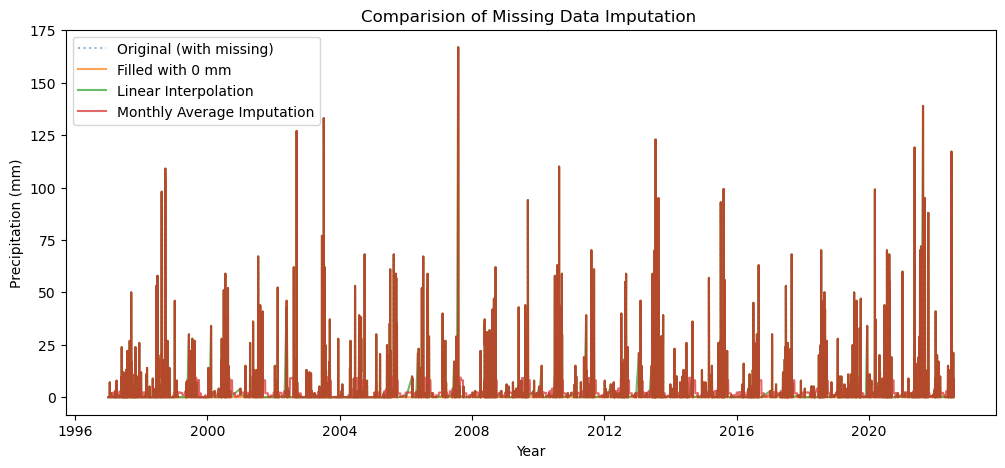

In [54]:
plt.figure(figsize=(12,5))

plt.plot(df['time'], df['prcp'], label='Original (with missing)',alpha=0.5, linestyle=':')
plt.plot(df_filled_zero['time'], df_filled_zero['prcp'], label='Filled with 0 mm', alpha=0.7)
plt.plot(df_filled_interp['time'],df_filled_interp['prcp'], label='Linear Interpolation', alpha = 0.7)
plt.plot(df_filled_monthly['time'],df_filled_monthly['prcp'], label='Monthly Average Imputation', alpha=0.7)

plt.xlabel("Year")
plt.ylabel('Precipitation (mm)')
plt.title('Comparision of Missing Data Imputation ')
plt.legend()
plt.show()

In [56]:
print("Original Data:")
print(df["prcp"].describe())

print("\nFilled with 0 mm:")
print(df_filled_zero["prcp"].describe())

print("\nLinear Interpolation:")
print(df_filled_interp["prcp"].describe())

print("\nMonthly Average Imputation:")
print(df_filled_monthly["prcp"].describe())


Original Data:
count    3558.000000
mean        4.478049
std        12.923603
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       166.900000
Name: prcp, dtype: float64

Filled with 0 mm:
count    9337.000000
mean        1.706426
std         8.268266
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       166.900000
Name: prcp, dtype: float64

Linear Interpolation:
count    9337.000000
mean        3.123916
std        10.133822
min         0.000000
25%         0.000000
50%         0.150000
75%         1.500000
max       166.900000
Name: prcp, dtype: float64

Monthly Average Imputation:
count    9337.000000
mean        3.666987
std         8.311063
min         0.000000
25%         0.277619
50%         1.865174
75%         2.800619
max       166.900000
Name: prcp, dtype: float64


### Monthly Average Imputation turns out to be the best method to handle the missing values of this dataset 

In [60]:
monthly_avg = df.groupby(df['time'].dt.month)['prcp'].transform('mean')

# Fill missing values with monthly averages
df['prcp'] = df['prcp'].fillna(monthly_avg)

# Verify the change
print(df['prcp'].describe())

count    9337.000000
mean        3.666987
std         8.311063
min         0.000000
25%         0.277619
50%         1.865174
75%         2.800619
max       166.900000
Name: prcp, dtype: float64


C:\Users\Aabhas\AppData\Local\Temp\ipykernel_9332\14261524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prcp'] = df['prcp'].fillna(monthly_avg)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9337 entries, 2557 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    9337 non-null   datetime64[ns]
 1   tavg    9330 non-null   float64       
 2   tmin    8389 non-null   float64       
 3   tmax    9104 non-null   float64       
 4   prcp    9337 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 437.7 KB


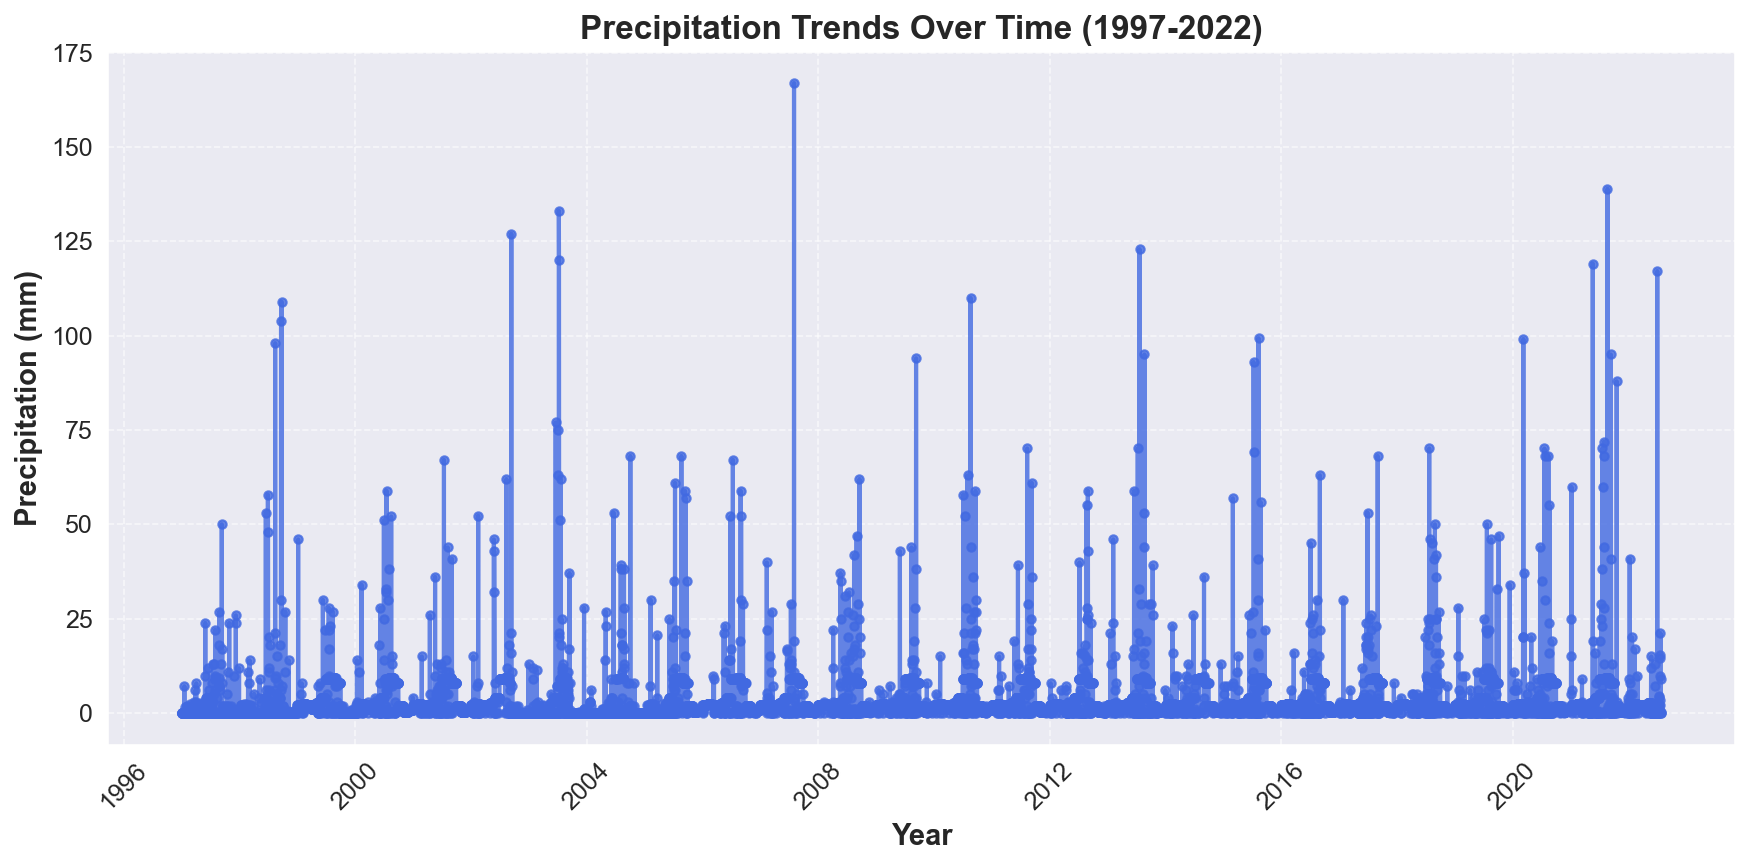

In [83]:
sns.set_style("darkgrid")

# Create figure with increased size and resolution
plt.figure(figsize=(14, 6), dpi=150)

# Improved line plot with markers and transparency
plt.plot(df['time'], df['prcp'], color='royalblue', linewidth=2, marker="o", markersize=4, alpha=0.8)

# Enhancing labels and title
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Precipitation (mm)", fontsize=14, fontweight='bold')
plt.title("Precipitation Trends Over Time (1997-2022)", fontsize=16, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid with customization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


## Monthly & Yearly Trends 

In [63]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_9332\3019320159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time'].dt.year
C:\Users\Aabhas\AppData\Local\Temp\ipykernel_9332\3019320159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].dt.month


In [64]:
monthly_avg = df.groupby('month')['prcp'].mean()

In [65]:
yearly_total = df.groupby('year')['prcp'].sum()

In [67]:
monthly_avg


month
1     2.204563
2     2.301271
3     2.104032
4     1.035458
5     2.800619
6     4.055647
7     9.041935
8     9.316507
9     8.097859
10    1.865174
11    0.277619
12    0.861261
Name: prcp, dtype: float64

## Plot Monthly Trends 

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_9332\1828328982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


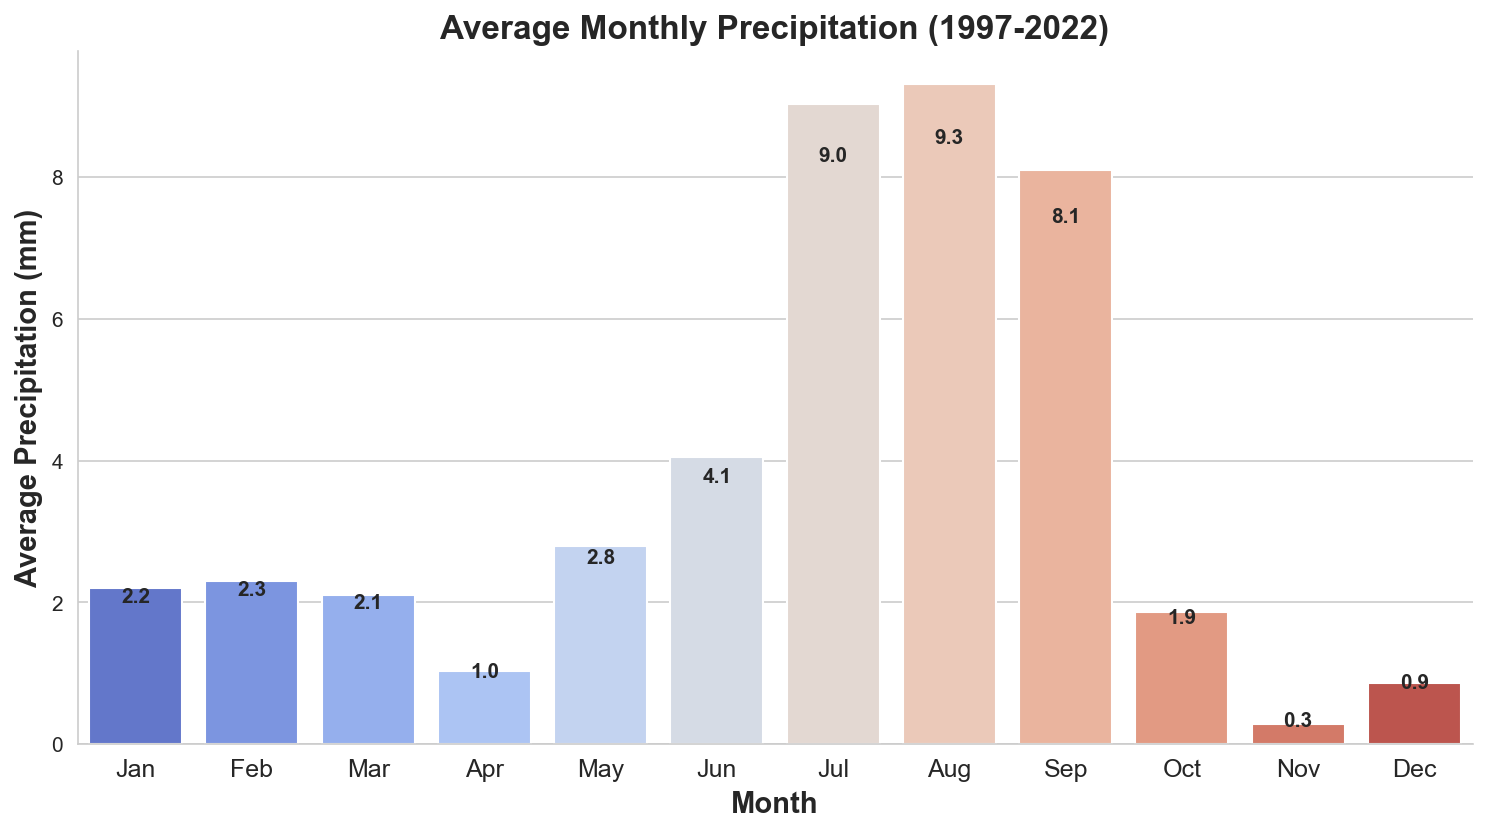

In [102]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create figure with increased size and resolution
plt.figure(figsize=(12, 6), dpi=150)

# Improved bar plot
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")

# Enhancing labels and title
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Precipitation (mm)', fontsize=14, fontweight='bold')
plt.title('Average Monthly Precipitation (1997-2022)', fontsize=16, fontweight='bold')

# Customizing x-axis ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Adding values on top of bars
for i, value in enumerate(monthly_avg.values):
    plt.text(i, value - (value*0.09), f'{value:.1f}', ha='center', fontsize=10, fontweight='bold')

# Remove top and right borders for a cleaner look
sns.despine()

# Show plot
plt.show()

## Plot Yearly Trends 

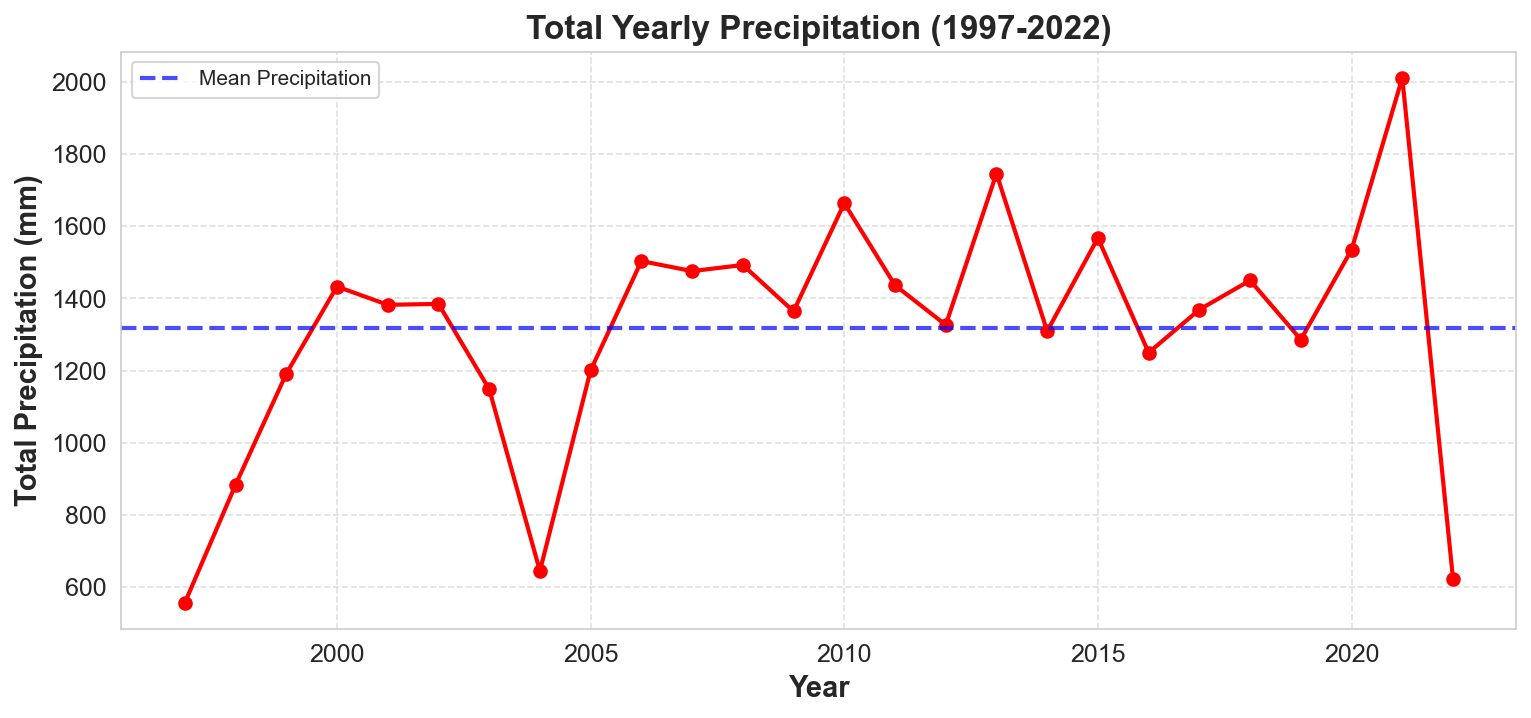

In [99]:
plt.figure(figsize=(12, 5), dpi=150)  # Higher DPI for better clarity
plt.plot(yearly_total.index, yearly_total.values, marker='o', linestyle='-', color='red', markersize=6, linewidth=2)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Precipitation (mm)', fontsize=14, fontweight='bold')
plt.title('Total Yearly Precipitation (1997-2022)', fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # Dotted grid lines for clarity
plt.axhline(y=yearly_total.mean(), color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Mean Precipitation') # Optional Mean line

plt.legend()
plt.show()


## Identify Extreme Rainfall Events 

In [70]:
threshold = df['prcp'].quantile(0.95)
extreme = df[df['prcp']>threshold]
print(extreme[['time','prcp']])


            time   prcp
2705  1997-05-29    9.9
2707  1997-05-31   23.9
2726  1997-06-19   11.9
2756  1997-07-19   13.0
2760  1997-07-23   13.0
...          ...    ...
11869 2022-07-01  117.1
11884 2022-07-16   15.3
11885 2022-07-17    9.7
11888 2022-07-20   14.7
11889 2022-07-21   21.2

[455 rows x 2 columns]


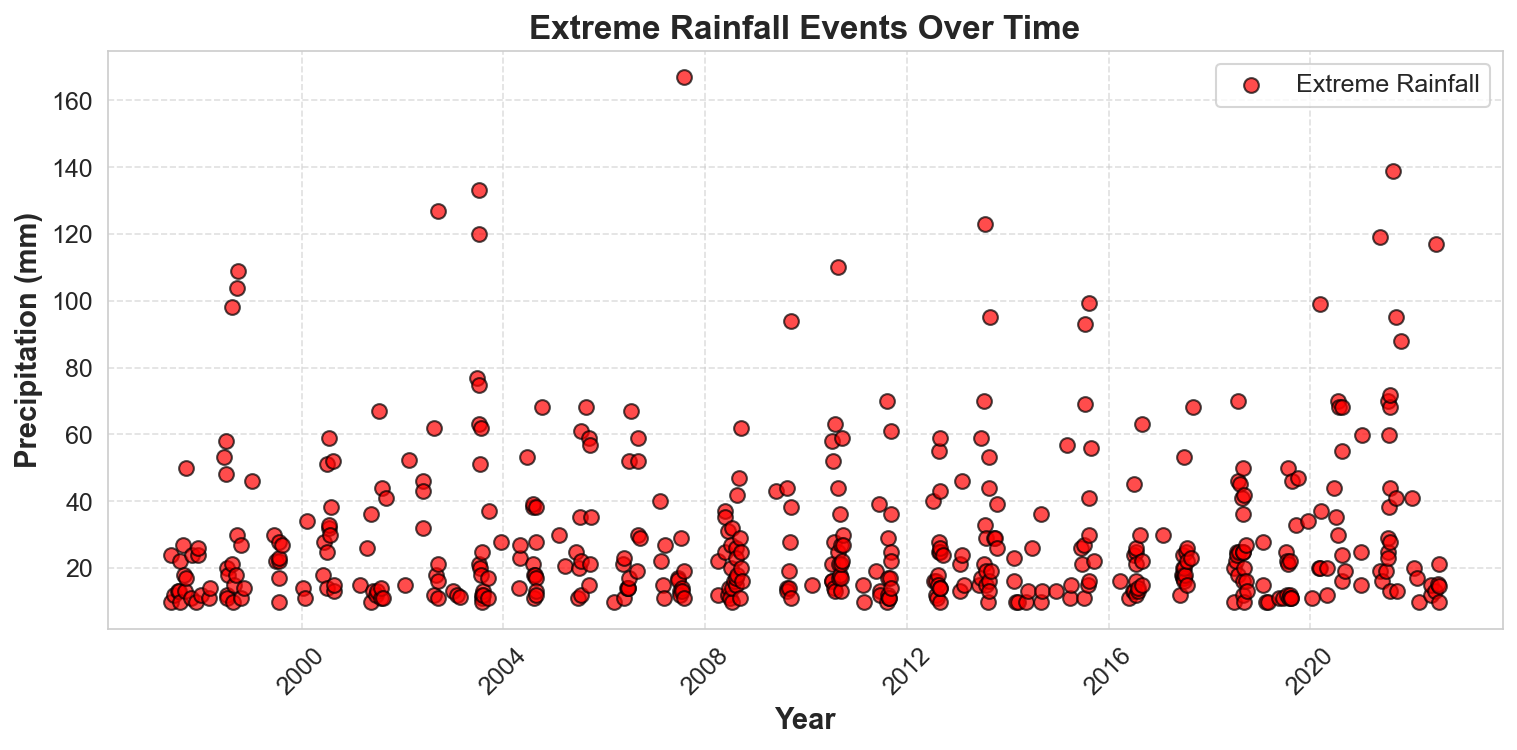

In [100]:
# Plot extreme events 
plt.figure(figsize=(12, 5), dpi=150)  # High DPI for better clarity
plt.scatter(extreme['time'], extreme['prcp'], color='red', s=50, alpha=0.7, edgecolors='black', label='Extreme Rainfall')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel("Precipitation (mm)", fontsize=14, fontweight='bold')
plt.title("Extreme Rainfall Events Over Time", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12, rotation=45)  # Rotate if overlapping
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)  # Light grid for better readability
plt.legend(fontsize=12)

plt.show()


C:\Users\Aabhas\AppData\Local\Temp\ipykernel_9332\4069365610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_avg'] = df['prcp'].rolling(window=30).mean()


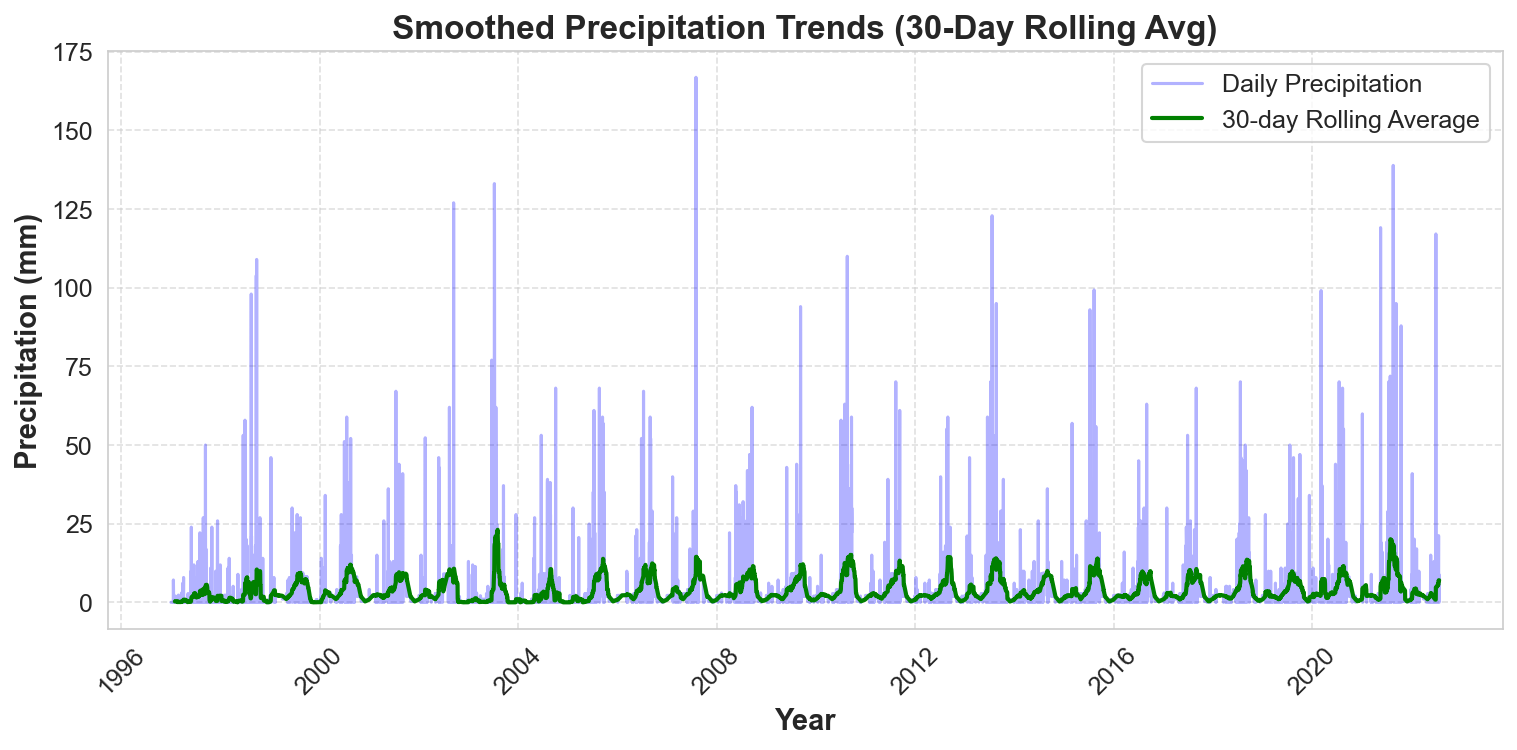

In [101]:
df['rolling_avg'] = df['prcp'].rolling(window=30).mean()

plt.figure(figsize=(12, 5), dpi=150)  # High resolution for clarity

# Plot actual precipitation data with low opacity
plt.plot(df['time'], df['prcp'], color='blue', alpha=0.3, label="Daily Precipitation")

# Plot 30-day rolling average
plt.plot(df['time'], df['rolling_avg'], color='green', linewidth=2, label="30-day Rolling Average")

# Labels & Titles
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Precipitation (mm)", fontsize=14, fontweight='bold')
plt.title("Smoothed Precipitation Trends (30-Day Rolling Avg)", fontsize=16, fontweight='bold')

# Axis Ticks
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels if needed
plt.yticks(fontsize=12)

# Grid & Legend
plt.grid(True, linestyle='--', alpha=0.6)  # Dashed, semi-transparent grid
plt.legend(fontsize=12)

# Show plot
plt.show()


In [104]:
yearly_summary = df.groupby('year')['prcp'].agg(
    total_precipitation = 'sum',
    average_precipitation = 'mean',
    extreme_events = lambda x: (x>50).sum()
).reset_index()

In [114]:
yearly_summary.to_excel("yearly_precipitation_summary.xlsx",index=False)

In [109]:
year_month_table = df.pivot_table(
    index='year',columns='month', values='prcp', aggfunc='sum'
)
year_month_table.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year_month_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1997,8.600000,4.601271,14.408065,12.435458,46.001858,57.300826,67.341935,128.833014,92.597859,48.230348,13.177619,63.422523
1998,6.613688,18.002542,30.108065,5.600000,15.800619,133.311295,133.700000,185.016507,293.897859,41.530348,15.055238,5.167568
1999,114.114068,60.133051,65.225000,31.063745,76.913622,155.491185,281.196774,207.797129,188.252905,9.325871,0.277619,1.722523
2000,63.173004,93.833051,64.016935,30.028287,80.716099,156.257300,349.951613,292.963158,205.946483,57.820398,8.328571,29.937838
2001,68.136882,70.230508,57.808871,57.080080,132.212384,117.990358,259.629032,258.846651,267.640061,57.820398,8.328571,26.699099
2002,72.909506,110.022881,61.316935,29.492829,196.014861,108.491185,280.300000,291.046651,216.493578,4.730348,0.277619,13.861261
2003,22.800000,16.002542,7.104032,3.070916,13.801858,124.633884,667.667742,162.365072,100.395719,0.000000,0.277619,30.761261
2004,17.100000,0.000000,0.000000,41.241833,35.301858,81.166942,49.209677,316.599043,19.195719,85.325871,0.000000,0.000000
2005,7.409125,52.305085,31.812097,2.070916,12.001858,85.078237,252.819355,321.645694,342.963609,57.820398,8.328571,26.699099


In [111]:
year_month_table.to_excel('yearly_monthly_prcp.xlsx')